In [1]:
import os

In [2]:
os.chdir("../core/")

In [3]:
%%capture
from load_datasets import *
from ensemble import *
from saliency import *
from scipy.stats import describe

In [4]:
(SVHN_trainX, SVHN_trainY),(SVHN_testX, SVHN_testY) = load_data("SVHN")
(MNIST_trainX, MNIST_trainY),(MNIST_testX, MNIST_testY) = load_data("MNIST")
NotMNIST = load_data("NotMNIST")
(CIFAR10_trainX, CIFAR10_trainY),(CIFAR10_testX, CIFAR10_testY) = load_data("CIFAR10")

../../datasets/notMNIST_small/A
Could not read: ../../datasets/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/B
../../datasets/notMNIST_small/C
../../datasets/notMNIST_small/D
../../datasets/notMNIST_small/E
../../datasets/notMNIST_small/F
Could not read: ../../datasets/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/G
../../datasets/notMNIST_small/H
../../datasets/notMNIST_small/I
../../datasets/notMNIST_small/J


In [5]:
MNIST_trainX,MNIST_testX = pad_dataset(MNIST_trainX),pad_dataset(MNIST_testX)
NotMNIST = pad_dataset(NotMNIST)

# Creating ensemble

In [6]:
CIFAR10_lenet = get_lenet(input_shape = np.shape(CIFAR10_trainX[0]))
train_network(network = CIFAR10_lenet, trainX = CIFAR10_trainX, trainY = CIFAR10_trainY)
CIFAR10_lenets = clone_network_into_ensemble(number_of_networks = 5, network = CIFAR10_lenet)
train_ensemble(ensemble = CIFAR10_lenets, trainX = CIFAR10_trainX, trainY = CIFAR10_trainY)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
50000/50000 [==============================] - 13s 254us/step - loss: 1.8571 - acc: 0.3323
Epoch 2/5
50000/50000 [==============================] - 10s 195us/step - loss: 1.5035 - acc: 0.4650
Epoch 3/5
50000/50000 [==============================] - 10s 193us/step - loss: 1.3566 - acc: 0.5193
Epoch 4/5
50000/50000 [==============================] - 10s 194us/step - loss: 1.2461 - acc: 0.5609
Epoch 5/5
50000/50000 [==============================] - 10s 192us/step - loss: 1.1455 - acc: 0.5985
Epoch 1/5
50000/50000 [==============================] - 11s 216us/step - loss: 1.8377 - acc: 0.3405
Epoch 2/5
50000/50000 [==============================] - 10s 201us/step - loss: 1.4850 - acc: 0.4695
Epoch 3/5
50000/50000 [==============================] - 10s 201us/step - loss: 1.3307 - acc: 0.5290
Epoch 4/5
50000/50000 [==============================] - 10s 201us/step - loss: 1.2137 - acc: 0.5720
Epoch 5/5
50000/50000 [==============================] - 10s 201us/step - loss: 1.1175 - ac

In [7]:
CIFAR10_optimizers = get_ensemble_optimisers(ensemble = CIFAR10_lenets, grad_cam = True)

# Extracting data

## CIFAR10

In [8]:
CIFAR10_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = CIFAR10_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_predicted_outputs = get_ensemble_predicted_outputs(ensemble = CIFAR10_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_output_values_of_predicted_outputs = np.take(CIFAR10_outputs_values,CIFAR10_predicted_outputs)

In [9]:
CIFAR10_ensemble_votes = get_ensemble_votes_for_multiple_inputs(CIFAR10_lenets,CIFAR10_testX,10)
CIFAR10_majority_voting_predicted_outputs = np.argmax(CIFAR10_ensemble_votes,axis = 1)
CIFAR10_vote_ratios_of_predicted_outputs = np.max(CIFAR10_ensemble_votes,axis = 1)/5
CIFAR10_different_instances_between_voting_and_averaging = np.nonzero(CIFAR10_majority_voting_predicted_outputs-CIFAR10_predicted_outputs)[0]

In [10]:
CIFAR10_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = CIFAR10_lenets,
    inputs = CIFAR10_testX,
    output_nodes = CIFAR10_predicted_outputs,
    optimisers = CIFAR10_optimizers,
    visualised_layer = 9,
    grad_cam = True)

CIFAR10_uncertainties = calculate_uncertainties_with_maps(CIFAR10_saliency_maps)

100%|██████████| 10000/10000 [00:41<00:00, 241.44it/s]


In [11]:
CIFAR10_singular_predictions_values = CIFAR10_lenet.predict(CIFAR10_testX)

In [12]:
CIFAR10_variance = np.var(CIFAR10_singular_predictions_values,axis = 1)

## SVHN

In [13]:
SVHN_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = CIFAR10_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_predicted_outputs = get_ensemble_predicted_outputs(ensemble = CIFAR10_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_output_values_of_predicted_outputs = np.take(SVHN_outputs_values,SVHN_predicted_outputs)

In [14]:
SVHN_ensemble_votes = get_ensemble_votes_for_multiple_inputs(CIFAR10_lenets,SVHN_testX,10)
SVHN_majority_voting_predicted_outputs = np.argmax(SVHN_ensemble_votes,axis = 1)
SVHN_vote_ratios_of_predicted_outputs = np.max(SVHN_ensemble_votes,axis = 1)/5
SVHN_different_instances_between_voting_and_averaging = np.nonzero(SVHN_majority_voting_predicted_outputs-SVHN_predicted_outputs)[0]

In [15]:
SVHN_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = CIFAR10_lenets,
    inputs = SVHN_testX,
    output_nodes = SVHN_predicted_outputs,
    optimisers = CIFAR10_optimizers,
    visualised_layer = 9,
    grad_cam = True)

SVHN_uncertainties = calculate_uncertainties_with_maps(SVHN_saliency_maps)

100%|██████████| 26032/26032 [01:45<00:00, 247.70it/s]


In [16]:
SVHN_singular_predictions_values = CIFAR10_lenet.predict(SVHN_testX)

In [17]:
SVHN_variance = np.var(SVHN_singular_predictions_values,axis = 1)

## MNIST

In [18]:
MNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = CIFAR10_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = CIFAR10_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_output_values_of_predicted_outputs = np.take(MNIST_outputs_values,MNIST_predicted_outputs)

In [19]:
MNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(CIFAR10_lenets,MNIST_testX,10)
MNIST_majority_voting_predicted_outputs = np.argmax(MNIST_ensemble_votes,axis = 1)
MNIST_vote_ratios_of_predicted_outputs = np.max(MNIST_ensemble_votes,axis = 1)/5
MNIST_different_instances_between_voting_and_averaging = np.nonzero(MNIST_majority_voting_predicted_outputs-MNIST_predicted_outputs)[0]

In [20]:
MNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = CIFAR10_lenets,
    inputs = MNIST_testX,
    output_nodes = MNIST_predicted_outputs,
    optimisers = CIFAR10_optimizers,
    visualised_layer = 9,
    grad_cam = True)

MNIST_uncertainties = calculate_uncertainties_with_maps(MNIST_saliency_maps)

100%|██████████| 10000/10000 [00:40<00:00, 248.19it/s]


In [21]:
MNIST_singular_predictions_values = CIFAR10_lenet.predict(MNIST_testX)

In [22]:
MNIST_variance = np.var(MNIST_singular_predictions_values,axis = 1)

## NotMNIST

In [23]:
NotMNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = CIFAR10_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = CIFAR10_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_output_values_of_predicted_outputs = np.take(NotMNIST_outputs_values,NotMNIST_predicted_outputs)

In [24]:
NotMNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(CIFAR10_lenets,NotMNIST,10)
NotMNIST_majority_voting_predicted_outputs = np.argmax(NotMNIST_ensemble_votes,axis = 1)
NotMNIST_vote_ratios_of_predicted_outputs = np.max(NotMNIST_ensemble_votes,axis = 1)/5
NotMNIST_different_instances_between_voting_and_averaging = np.nonzero(NotMNIST_majority_voting_predicted_outputs-NotMNIST_predicted_outputs)[0]

In [25]:
NotMNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = CIFAR10_lenets,
    inputs = NotMNIST,
    output_nodes = NotMNIST_predicted_outputs,
    optimisers = CIFAR10_optimizers,
    visualised_layer = 9,
    grad_cam = True)

NotMNIST_uncertainties = calculate_uncertainties_with_maps(NotMNIST_saliency_maps)

100%|██████████| 18724/18724 [01:15<00:00, 248.34it/s]


In [26]:
NotMNIST_singular_predictions_values = CIFAR10_lenet.predict(NotMNIST)

In [27]:
NotMNIST_variance = np.var(NotMNIST_singular_predictions_values,axis = 1)

# Exploring data

In [28]:
plt.style.use('default')

In [29]:
# General evaluation
print("Evaluation (loss,acc) of singular LeNet:")
print(CIFAR10_lenet.evaluate(CIFAR10_testX, CIFAR10_testY))
print("")
print("Evaluation (loss,acc) of each LeNet in the ensemble:")
for lenet in CIFAR10_lenets:
    print(lenet.evaluate(CIFAR10_testX, CIFAR10_testY))
print("")
print("Accuracy of ensemble:")
print(evaluate_ensemble_accuracy(CIFAR10_lenets,CIFAR10_testX,CIFAR10_testY))
print("")
print("Averaged softmax output values of any output node of the ensemble:")
print(describe(CIFAR10_outputs_values,axis=None))
print("")
print("Averaged softmax output values of the ensemble's predicted outputs:")
print(describe(CIFAR10_output_values_of_predicted_outputs))
print("")
print("Softmax output values of the singular LeNet's outputs:")
print(describe(CIFAR10_lenet.predict(CIFAR10_testX),axis = None))
print("")

Evaluation (loss,acc) of singular LeNet:
10000/10000 [==============================] - 1s 129us/step
[1.1629932266235352, 0.5862]

Evaluation (loss,acc) of each LeNet in the ensemble:
10000/10000 [==============================] - 1s 126us/step
[1.1347037804603577, 0.6039]
10000/10000 [==============================] - 1s 123us/step
[1.108856947517395, 0.6122]
10000/10000 [==============================] - 1s 125us/step
[1.1333748756408693, 0.602]
10000/10000 [==============================] - 1s 126us/step
[1.151338999938965, 0.5883]
10000/10000 [==============================] - 1s 128us/step
[1.1409892805099486, 0.5922]

Accuracy of ensemble:
0.6385

Averaged softmax output values of any output node of the ensemble:
DescribeResult(nobs=100000, minmax=(6.075945035988184e-09, 0.999832272529602), mean=0.09999999998959083, variance=0.033986427990638474, skewness=2.696815336625528, kurtosis=7.284894828028335)

Averaged softmax output values of the ensemble's predicted outputs:
DescribeR

## CIFAR10

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.17477860052914024, 1.998046875), mean=0.3998940134455539, variance=0.005326058096327459, skewness=1.457054180572864, kurtosis=24.04039503199208)
Histogram of uncertainty values:


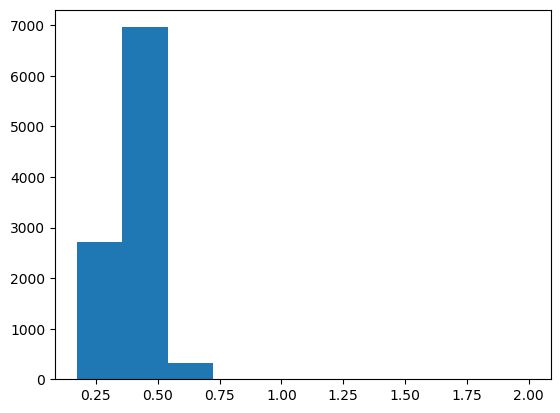

In [30]:
print("Statistical description of uncertainty values:")
print(describe(CIFAR10_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(CIFAR10_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


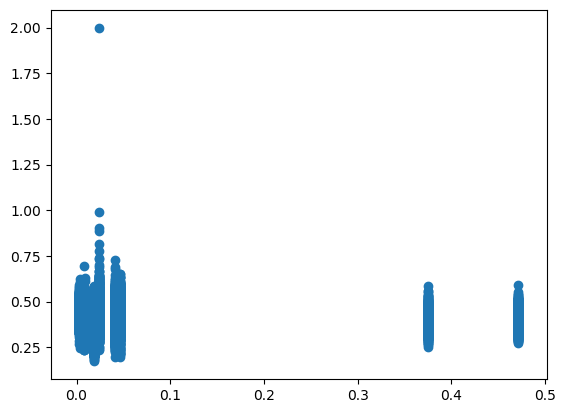

In [31]:
plt.scatter(x = CIFAR10_output_values_of_predicted_outputs, y = CIFAR10_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.0012564308, 0.089861706), mean=0.0362106, variance=0.0005420526, skewness=0.6504297852516174, kurtosis=-0.6993496385032798)


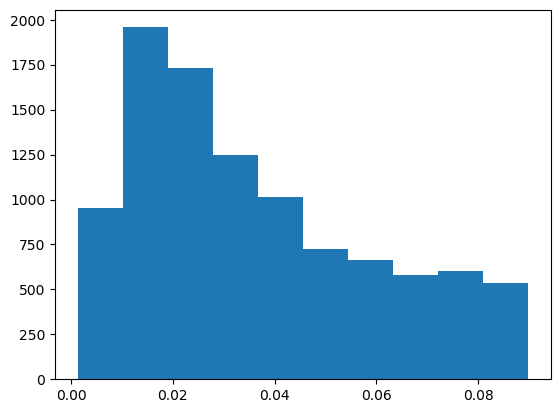

In [32]:
print("Variance of singular LeNet's outputs for each input")
print(describe(CIFAR10_variance))
plt.hist(CIFAR10_variance)
plt.show()

800
0.92
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.81786, variance=0.04108112851285129, skewness=-0.6900680408306815, kurtosis=-0.7706532541535149)


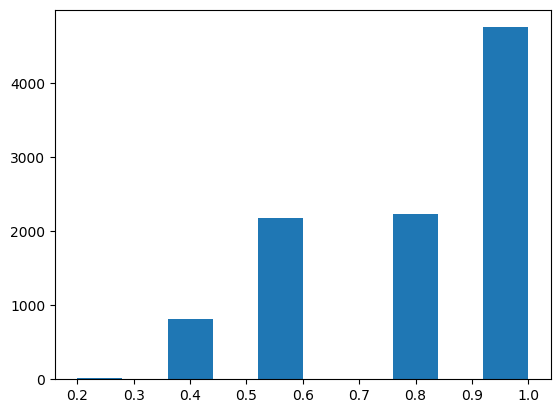

In [33]:
print(len(CIFAR10_different_instances_between_voting_and_averaging))
print(1 - len(CIFAR10_different_instances_between_voting_and_averaging)/len(CIFAR10_testX))
print(describe(CIFAR10_vote_ratios_of_predicted_outputs))
plt.hist(CIFAR10_vote_ratios_of_predicted_outputs)
plt.show()

## SVHN

Statistical description of uncertainty values:
DescribeResult(nobs=26032, minmax=(0.17410447763066644, 1.3236177292818607), mean=0.3875548819618597, variance=0.005143232402871594, skewness=0.8391220371262881, kurtosis=2.3862609021218955)
Histogram of uncertainty values:


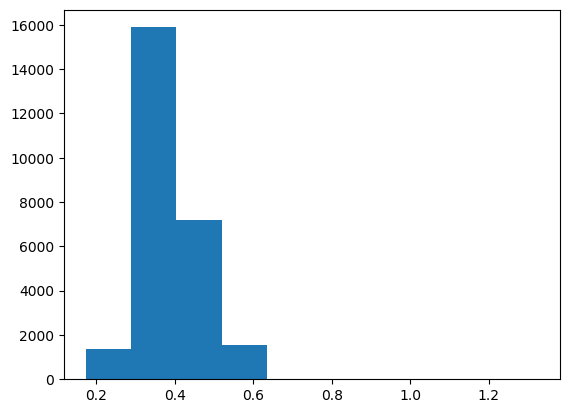

In [34]:
print("Statistical description of uncertainty values:")
print(describe(SVHN_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(SVHN_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


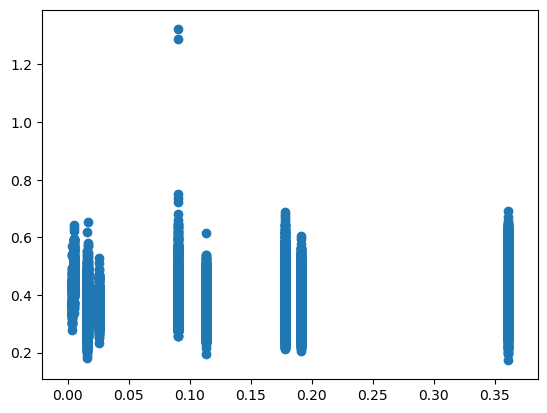

In [35]:
plt.scatter(x = SVHN_output_values_of_predicted_outputs, y = SVHN_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=26032, minmax=(0.00058674254, 0.083764955), mean=0.01573316, variance=9.9331286e-05, skewness=1.762560248374939, kurtosis=4.382235526563204)


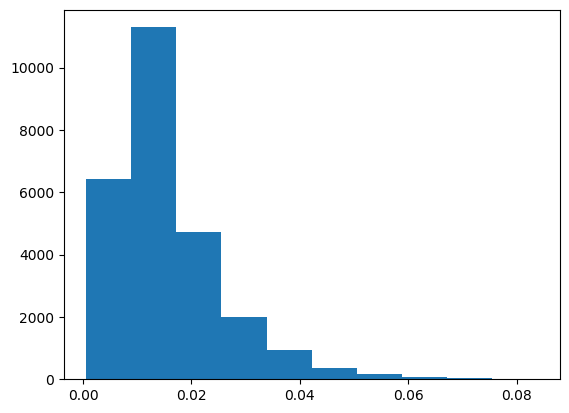

In [36]:
print("Variance of singular LeNet's outputs for each input")
print(describe(SVHN_variance))
plt.hist(SVHN_variance)
plt.show()

3283
0.8738859864781807
DescribeResult(nobs=26032, minmax=(0.2, 1.0), mean=0.7270590043023971, variance=0.04335982625982066, skewness=-0.07461431590566524, kurtosis=-1.1609355600481708)


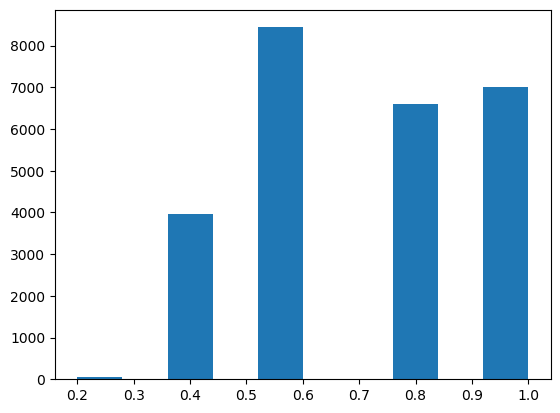

In [37]:
print(len(SVHN_different_instances_between_voting_and_averaging))
print(1 - len(SVHN_different_instances_between_voting_and_averaging)/len(SVHN_testX))
print(describe(SVHN_vote_ratios_of_predicted_outputs))
plt.hist(SVHN_vote_ratios_of_predicted_outputs)
plt.show()

## MNIST

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.22303686221399488, 1.036941912686462), mean=0.4265785703729184, variance=0.003983931677929012, skewness=0.8109376208406325, kurtosis=3.075757647697145)
Histogram of uncertainty values:


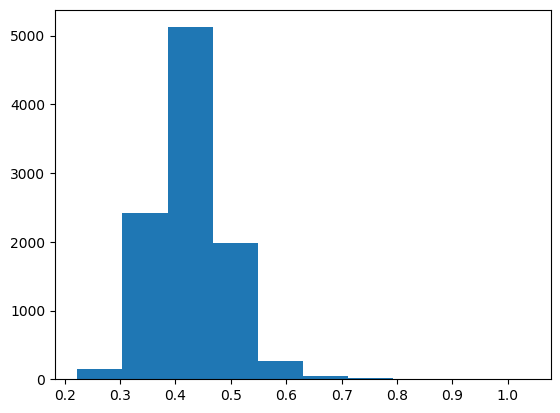

In [38]:
print("Statistical description of uncertainty values:")
print(describe(MNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(MNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


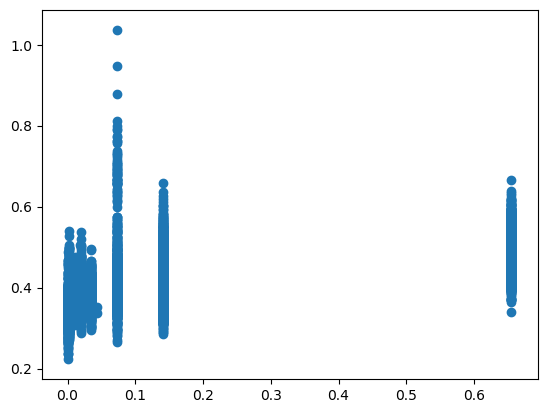

In [39]:
plt.scatter(x = MNIST_output_values_of_predicted_outputs, y = MNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.0060132276, 0.08642717), mean=0.03513059, variance=0.0002608073, skewness=0.683641791343689, kurtosis=-0.30859447834622644)


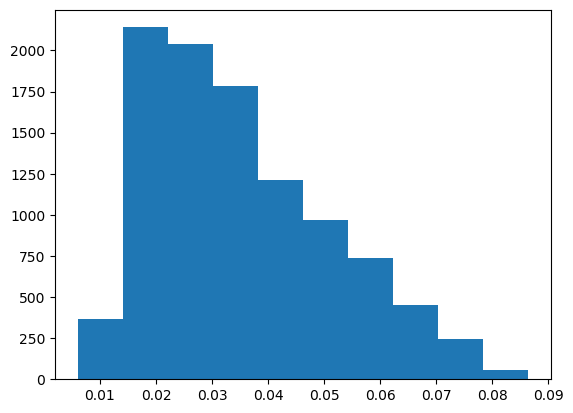

In [40]:
print("Variance of singular LeNet's outputs for each input")
print(describe(MNIST_variance))
plt.hist(MNIST_variance)
plt.show()

1329
0.8671
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.7091200000000001, variance=0.04277710331033103, skewness=-0.00839048252918007, kurtosis=-1.0442052250397527)


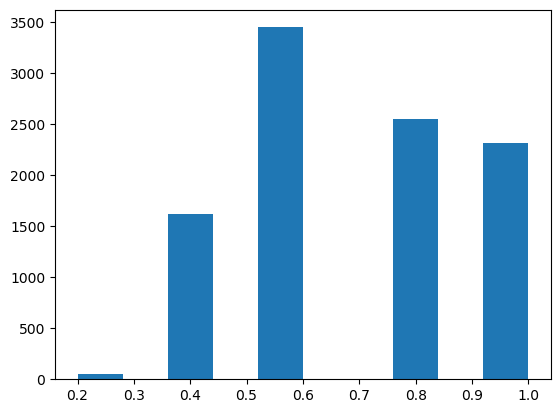

In [41]:
print(len(MNIST_different_instances_between_voting_and_averaging))
print(1 - len(MNIST_different_instances_between_voting_and_averaging)/len(MNIST_testX))
print(describe(MNIST_vote_ratios_of_predicted_outputs))
plt.hist(MNIST_vote_ratios_of_predicted_outputs)
plt.show()

## NotMNIST

Statistical description of uncertainty values:
DescribeResult(nobs=18724, minmax=(0.20997928231349525, 0.6839436888002657), mean=0.3835937148123154, variance=0.003912244606824114, skewness=0.4745651561028298, kurtosis=0.6449302560934362)
Histogram of uncertainty values:


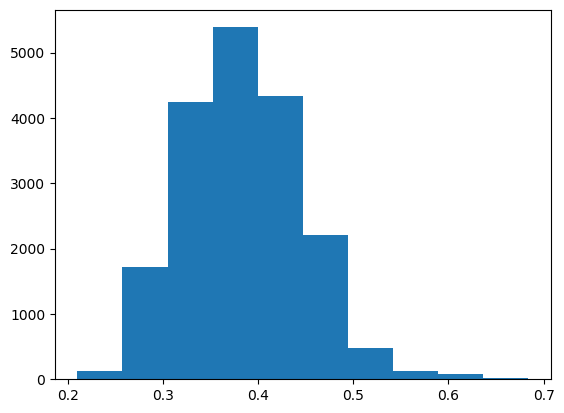

In [42]:
print("Statistical description of uncertainty values:")
print(describe(NotMNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(NotMNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


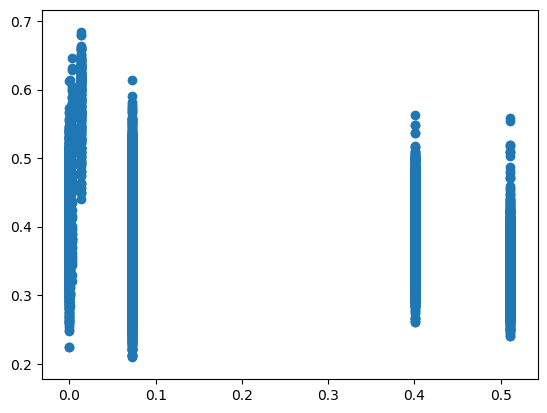

In [43]:
plt.scatter(x = NotMNIST_output_values_of_predicted_outputs, y = NotMNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=18724, minmax=(0.0027187094, 0.08959352), mean=0.03515173, variance=0.0003519586, skewness=0.76054847240448, kurtosis=-0.16019261325156275)


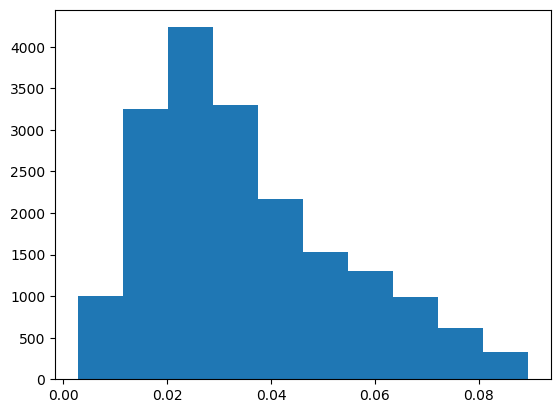

In [44]:
print("Variance of singular LeNet's outputs for each input")
print(describe(NotMNIST_variance))
plt.hist(NotMNIST_variance)
plt.show()

DescribeResult(nobs=18724, minmax=(0.2, 1.0), mean=0.7510574663533433, variance=0.04556689965102836, skewness=-0.2810309631943487, kurtosis=-1.1563382705144225)


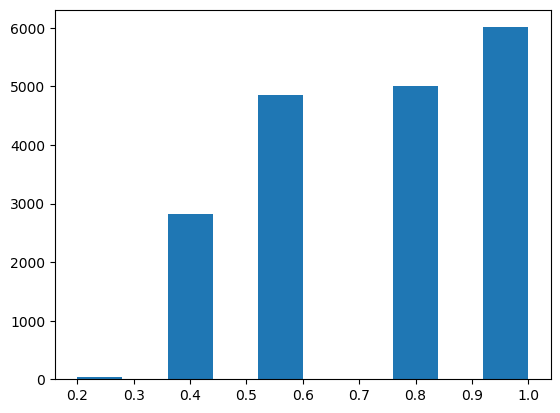

In [45]:
print(describe(NotMNIST_vote_ratios_of_predicted_outputs))
plt.hist(NotMNIST_vote_ratios_of_predicted_outputs)
plt.show()